In [73]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from PIL import Image
from io import BytesIO
import pandas as pd

In [53]:
fn = 'methylene_molecules.csv'
st_dir = '../src/starters_targets/'
save_to = f"../artifacts/{fn.split('.')[0] + '_mol_imgs.png'}"
df = pd.read_csv(st_dir + fn, sep=',')
smis = df.loc[:, 'smiles'].tolist()
names = df.loc[:, 'id'].tolist()
mols = [Chem.MolFromSmiles(elt) for elt in smis]

# Need explicit argument returnPNG to return PIL and not python image object
img = Draw.MolsToGridImage(mols, molsPerRow=1, subImgSize=(200, 200), legends=names, returnPNG=False)
img.save(save_to)

In [54]:
def draw_rxn(rxn_sma):
    return Draw.ReactionToImage(
        AllChem.ReactionFromSmarts(rxn_sma, useSmiles=True),
        subImgSize=(200, 200), useSVG=False, drawOptions=None, returnPNG=False
    )

In [74]:
def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)

def show_images(imgs,buffer=5):
    height = 0
    width = 0
    for img in imgs:
        height = max(height,img.height)
        width += img.width
    width += buffer*(len(imgs)-1)
    res = Image.new("RGBA",(width,height))
    x = 0
    for img in imgs:
        res.paste(img,(x,0))
        x += img.width + buffer
    return res

In [55]:
pred_sma = 'C=C(CCC(O)O)C(=O)O.NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C=CC1>>C=C(CCCO)C(=O)O.NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1.O'
known_sma = 'CC(=CCNc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O)CO.NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)C=CC1>>CC(C)=CCNc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O.NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(OP(=O)(O)O)C3O)C(O)C2O)c1.O'

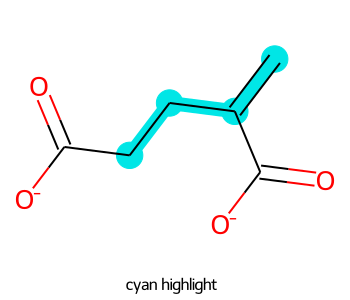

In [79]:
imgs = []
mol = mols[0]
aidxs = [0, 1, 2]
d2d = Draw.MolDraw2DCairo(350,300)
dopts = d2d.drawOptions()
dopts.setHighlightColour((0,.9,.9,.8))
imgs.append(show_mol(d2d,mol,legend='cyan highlight', highlightAtoms=(0,1,2,3)))
imgs[0]

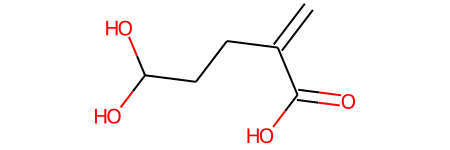

In [81]:
Chem.MolFromSmiles('C=C(CCC(O)O)C(=O)O')

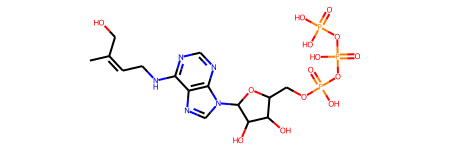

In [82]:
Chem.MolFromSmiles('CC(=CCNc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O)CO')